In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import dask
import xarray as xr
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [3]:
# Define the path to your zarr dataset
zarr_path = '/home/tsany/clim680_dataset/xBase_sliced_2004'

# Open the dataset using xarray
ds = xr.open_zarr(zarr_path)
ds

<xarray.Dataset>
Dimensions:   (time: 1093, lat: 3600, lon: 7200)
Coordinates:
  * lat       (lat) float64 89.97 89.92 89.88 89.83 ... -89.88 -89.92 -89.97
  * lon       (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * time      (time) datetime64[ns] 2001-01-01T12:00:00 ... 2003-12-30T12:00:00
Data variables:
    ET_daily  (time, lat, lon) float32 dask.array<chunksize=(1093, 40, 40), meta=np.ndarray>

In [4]:
monthly_mean = ds.ET_daily.groupby('time.month').mean()
monthly_mean

<xarray.DataArray 'ET_daily' (month: 12, lat: 3600, lon: 7200)>
dask.array<stack, shape=(12, 3600, 7200), dtype=float32, chunksize=(1, 40, 40), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 89.97 89.92 89.88 89.83 ... -89.88 -89.92 -89.97
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [4]:
monthly_mean.month

<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

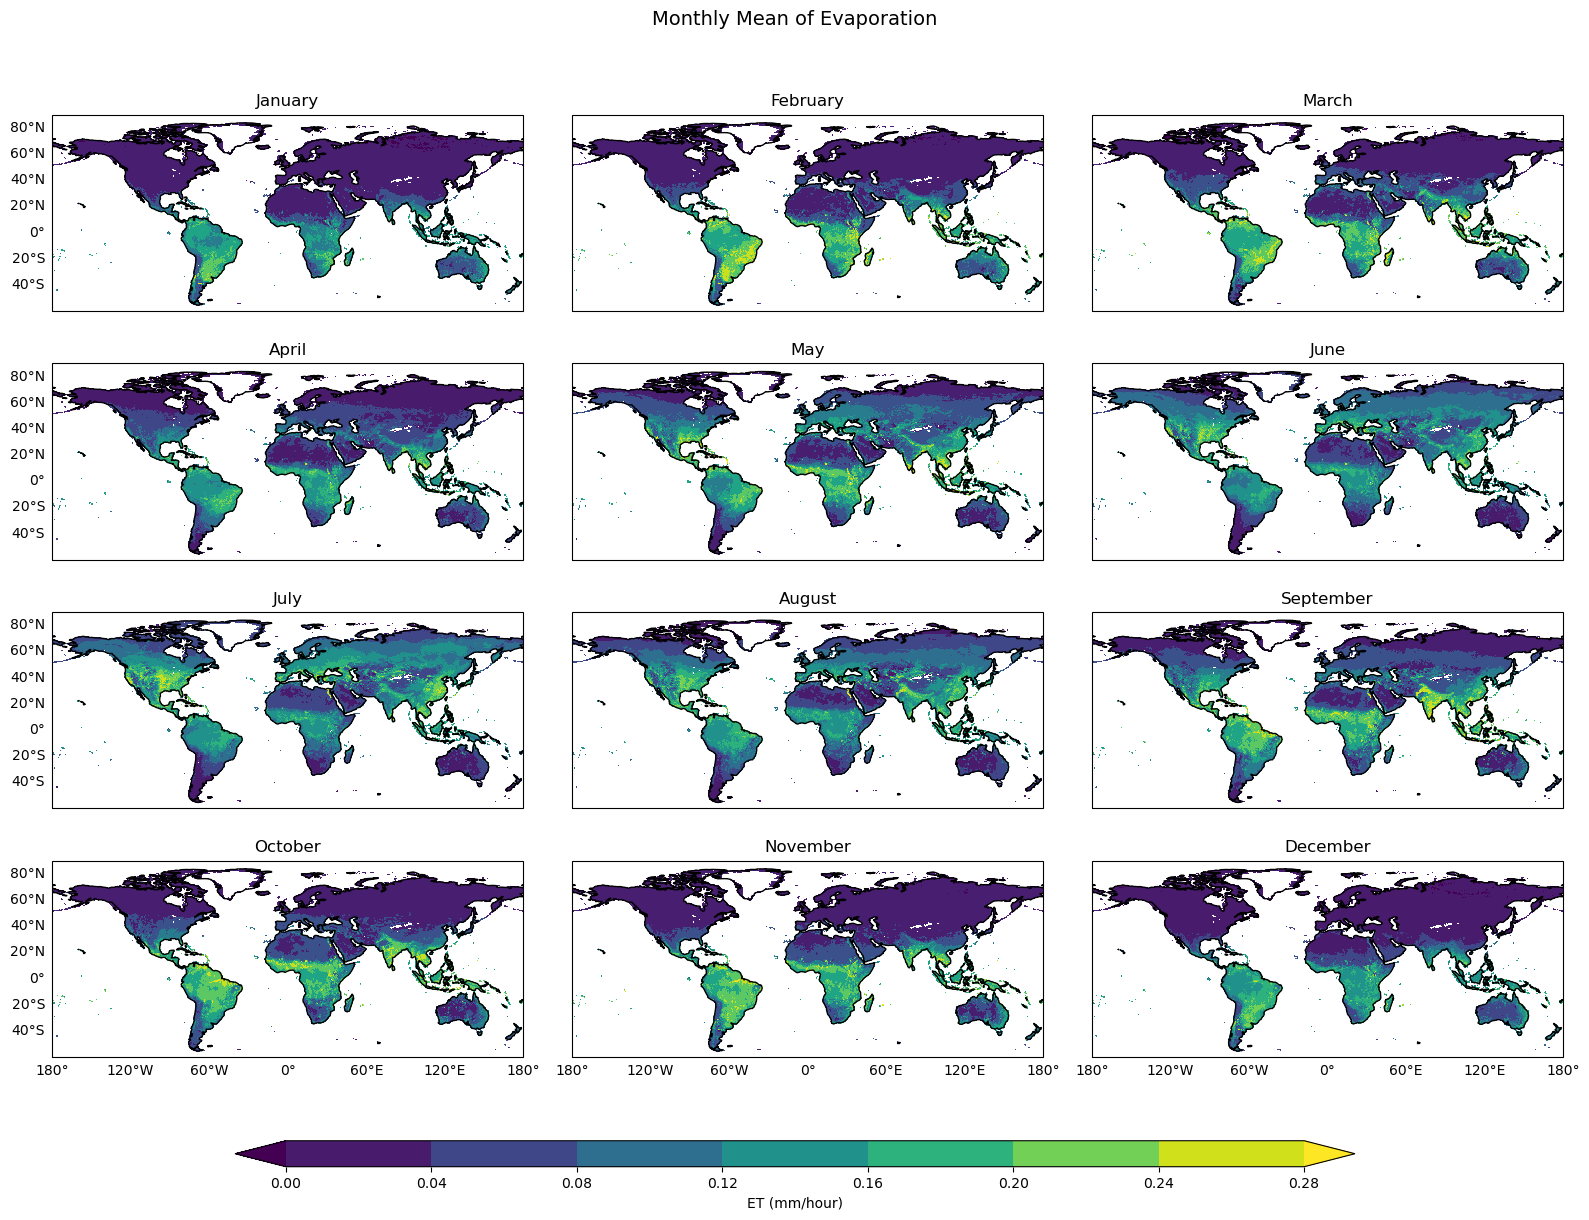

In [47]:
fig, axs = plt.subplots(4, 3, figsize=(16, 13), subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle('Monthly Mean of Evaporation', fontsize=14, y=0.93)
months = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]
months_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, (ax, month) in enumerate(zip(axs.flatten(), months)):
    data = monthly_mean.sel(month=month)
    data, lons = add_cyclic_point(data, coord=monthly_mean.lon)
    cs = ax.contourf(lons, monthly_mean.lat, data, transform=ccrs.PlateCarree(), cmap='viridis', extend='both')
    ax.coastlines()
    ax.set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())
    ax.set_title(months_name[month-1])
    
    # Adding gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0)
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = i//3==3 
    gl.left_labels = i % 3 == 0 
    plt.tight_layout()
    
# Adding a colorbar
cbar_ax = fig.add_axes([0.15, 0.04, 0.7, 0.02]) 
cbar = plt.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='ET (mm/hour)')

plt.show()